## Import libraries

In [4]:
import cv2
import pytesseract
from matplotlib import pyplot as plt
from os import listdir

In [5]:
%matplotlib notebook

## Functions

In [6]:
def show(image):
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    
def clearList(data):
    data = data.split("|")
    cleaned = []
    for i in data:
        if len(i) != 0:
            cleaned.append(i)
    
    return cleaned

In [7]:
def getThresh(img, mode=0):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur_img = cv2.medianBlur(img,5)

    if mode == 1:
        return cv2.adaptiveThreshold(blur_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
    elif mode == 2:
        return cv2.adaptiveThreshold(blur_img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
    else:
        return cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

In [8]:
def crop(img, x_start, y_start, x_end, y_end):
    return img[y_start:y_end, x_start:x_end]

## Teserract

In [9]:
import pytesseract
from pytesseract import image_to_string, image_to_data, Output

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
custom_config = r'--oem 3 --psm 6'

## Process Image

In [10]:
folder_dir = "receipts/"
files = listdir(folder_dir)
index = 0

In [215]:
index += 1
img = cv2.imread(folder_dir + files[index])
print("index = ", index, ", filename = ", files[index])

index =  37 , filename =  P_20210308_165026.jpg


<IPython.core.display.Javascript object>


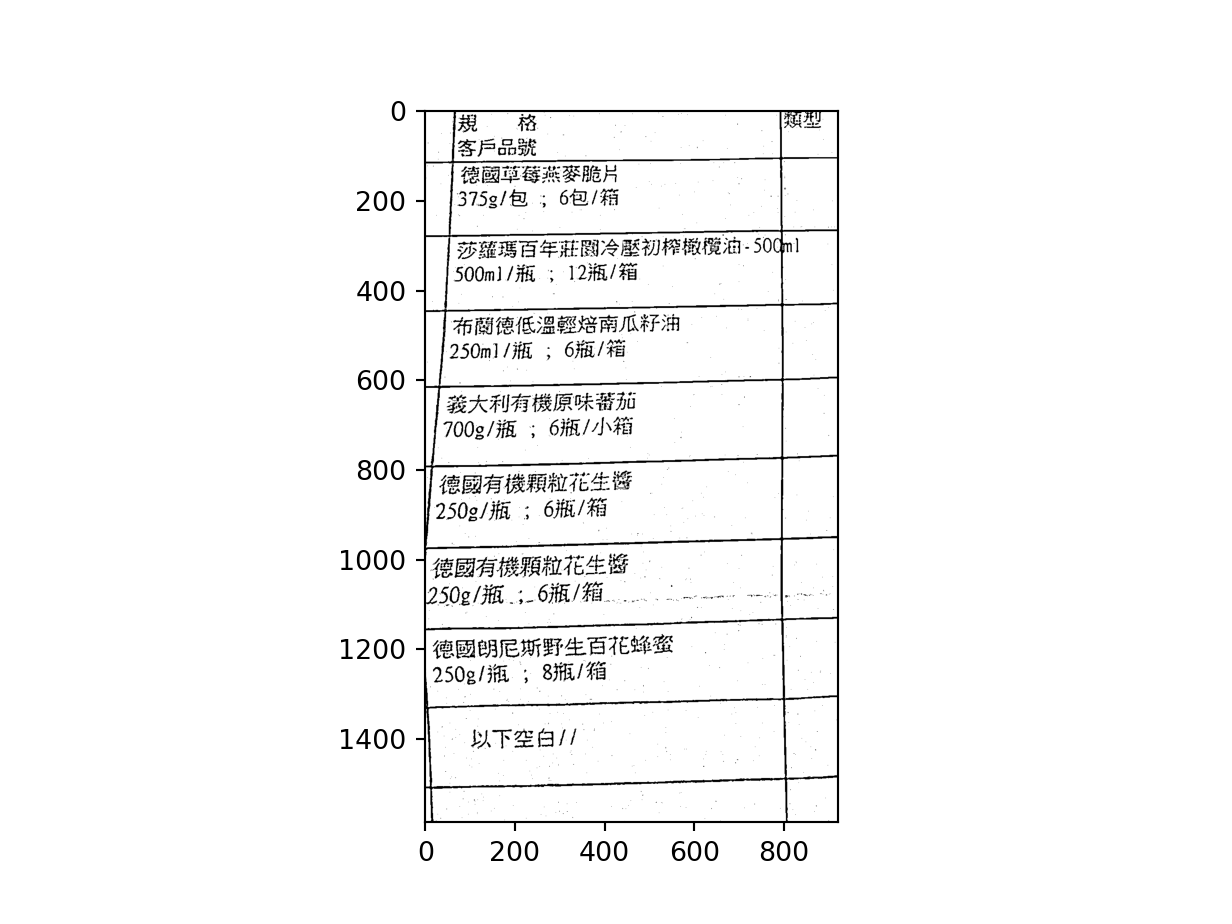

In [211]:
threshold_img = getThresh(img,1)
threshold_img = crop(threshold_img, 600,824,1520,2410)
show(threshold_img)

In [212]:
text = image_to_string(threshold_img, lang='chi_tra', config='--psm 4 --oem 3')
text = text.replace(" ","")
text = text.replace("\n","|")
text

'|||||||德邵草每蘊麥脆乒|375g/包;6包/箱|||||莎龜瑪百年莊園冷診初榨橄模油-500|500m]/瓶.;12瓶/箱||||||||||「布商德低溫輕焙南瓜籽油|250m1/瓶;6瓶/箱||||||義大利有機原味醫廊|700g/瓶;6瓶/小箱|||||||||德屬衣機蜂粒花生醬|250g/并;(瓶/箱||全有尼聞衝花生給|250g/瓶-;-6攬/箱一|||||德國朗尼斯野生百花蜂蜜|250g/瓶;8瓶/箱||||||一菸下空白//|\x0c'

In [213]:
cleared = clearList(text)
cleared

['德邵草每蘊麥脆乒',
 '375g/包;6包/箱',
 '莎龜瑪百年莊園冷診初榨橄模油-500',
 '500m]/瓶.;12瓶/箱',
 '「布商德低溫輕焙南瓜籽油',
 '250m1/瓶;6瓶/箱',
 '義大利有機原味醫廊',
 '700g/瓶;6瓶/小箱',
 '德屬衣機蜂粒花生醬',
 '250g/并;(瓶/箱',
 '全有尼聞衝花生給',
 '250g/瓶-;-6攬/箱一',
 '德國朗尼斯野生百花蜂蜜',
 '250g/瓶;8瓶/箱',
 '一菸下空白//',
 '\x0c']

In [214]:
import pandas as pd
import os

excel_name = "raw.xlsx"
df = pd.DataFrame([files[index]] + cleared[:-1])
df.to_excel(excel_name)

# open file
os.system(excel_name)


0